# **1. Theory: Binary Classification**

<hr color='red'/>

## **Task 1.1**

1. 👉 You have a binary classification problem to identify whether the client will payoff the loan to the bank. Based on the last year's percent change in his balance $N$, you should predict if the client will become bankrupt or not. It is known that on average a bankrupt client has a mean percent change in his balance of 5%, while a solvent client has a mean of 15% and $N$ is normally distrubuted with the $\sigma^2 = 25$, which means that for a bankrupt $N$ $\sim \mathcal{N}(5, 25)$ and for a solvent client $N$ $\sim \mathcal{N}(15, 25)$. We have a statistic that 0.75 of all clients paid off the debt. Predict the probability that the client will pay off the loan, given that the last year's percent change in his balance is 12.

<h3><font color='red'><b>SOLUTION 1.1:</b></font></h3>

Your solution goes here

In [ ]:
import numpy as np

def probability(mean, var, x):
  return np.exp(-1*((x - mean)**2)/(2*var))/np.sqrt(2*np.pi*var)

def posterior(x, f0, f1):
  return (x*f1)/((1 - x)*f0 + x*f1)

f0 = probability(5, 25, 12)
f1 = probability(15, 25, 12)
result = posterior(0.75, f0, f1)
result

0.8697343834724046

<hr color='red'/>

## **Task 1.2**


1. 👉 What is a class-imbalance problem? 
2. 👉 What are the best evaluation metrics of the binary classification model performance, if the data is class-imbalanced?
3. 👉 Consider the problem where you should predict if bank clients will or will not subscribe a term deposit. It is known that there are 4521 observations in the dataset. The target variable in this problem is binary: 0 means client will not subscribe, 1 means client will subscribe. Number of 1s in the target variable is 521 and number of 0s is 4000. You have splitted data into train and test sets (67% training set, 33% test set) and tried two different models: Logistic Regression and LDA in order to predict if client is a potentional subscriber or not and obtained the following confusion matrices:  
  3.1. Calculate **Precision, Recall and Accuracy for both models using confusion matrices.** Which model will you choose for predictions and why?



**LDA:**

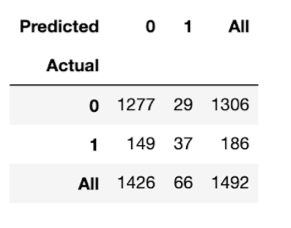

**Logistic Regression:**



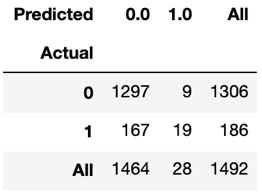



<h3><font color='red'><b>SOLUTION 1.2:</b></font></h3>

Your solution goes here

# **2. Practice: Pokemon Classification**

In this classification problem you are tasked to predict a class of $Y$ output in [Pokemon dataset](https://github.com/omelnikov/data/tree/main/Pokemon).

![List of Pokemons](https://i.redd.it/d4xhuy1qo2l41.png)

<font size=1>Image source: Unknown author. [Reddit](https://www.reddit.com/r/pokemon/comments/fef8bq/oc_starter_pokemon_final_evolutions_baby_sprites/). 2019</font>

Below we load important packages and set printing options.

In [ ]:
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all" # allows multiple outputs from a single cell
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix

np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)
pd.set_option('max_rows', 100, 'max_columns', 100, 'max_colwidth', 100, 'precision', 2, 'display.max_rows', 8)

<hr color='red'/>

## **Task 2.0: Set Your Seed**

In [ ]:
StudentName = "Pavel_Kalmanovich"  # For groups: "First_Last,First_Last"
MySeed = int.from_bytes(StudentName.encode(), 'little') % (2**32 - 1)  # this is your unique seed for your homework
print(f'"{StudentName}" results in {MySeed} seed')

"Arsenty_Rutsinskiy, Pavel_Kalmanovich" results in 1552804053 seed


Below we load a dataframe, subsample rows/columns for each student. The first column is your $Y$ output, which you need to model as a function of the remaining features in `df`. Please don't modify this individualization code.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/omelnikov/data/main/Pokemon/pokemon.csv')

Ycol = np.random.RandomState(MySeed).choice(['type1', 'generation', 'is_legendary']) # we choose Y column
class_list = np.random.RandomState(MySeed).choice(df[Ycol].unique().tolist(), size=2, replace=False) # choose two binary classes to predict
df = df.loc[df[Ycol].isin(class_list)] # remove other classes
MyColumns = sorted(np.random.RandomState(MySeed).choice(df.columns, size=np.random.RandomState(MySeed).randint(6,10), replace=False)) # sample feature names
df = pd.concat([df[[Ycol]], df[MyColumns]], axis=1).sample(frac=.5, random_state=MySeed) # add back Y and sample a fraction of observations
df = df.loc[:, ~df.columns.duplicated()]  # remove any duplicated Y variable among inputs (to prevent leakage)
df

,is_legendary,abilities,against_electric,against_fight,against_ice,against_rock,capture_rate,japanese_name,pokedex_number,weight_kg
209,0,"['Intimidate', 'Quick Feet', 'Rattled']",1.0,0.5,1.0,1.0,75,Granbuluグランブル,210,48.7
458,0,"['Snow Warning', 'Soundproof']",0.5,2.0,1.0,2.0,120,Yukikaburiユキカブリ,459,50.5
698,0,"['Refrigerate', 'Snow Warning']",1.0,4.0,0.5,2.0,45,Amarurugaアマルルガ,699,225.0
212,0,"['Sturdy', 'Gluttony', 'Contrary']",1.0,1.0,1.0,2.0,190,Tsubotsuboツボツボ,213,20.5
...,...,...,...,...,...,...,...,...,...,...
697,0,"['Refrigerate', 'Snow Warning']",1.0,4.0,0.5,2.0,45,Amarusアマルス,698,25.2
31,0,"['Poison Point', 'Rivalry', 'Hustle']",1.0,0.5,1.0,1.0,235,Nidoran?ニドラン♂,32,9.0
624,0,"['Defiant', 'Inner Focus', 'Pressure']",1.0,4.0,0.5,0.5,45,Kirikizanキリキザン,625,70.0
680,0,['Stance Change'],1.0,0.0,0.5,0.5,45,Gillgardギルガルド,681,53.0


In [ ]:
Ycol

'is_legendary'

<hr color='red'/>

## **Task 2.1: Ideas from raw subsample**



👉Describe 5+ (at least 5) **takeaways** about the small dataframe sample printed above. 
1. 📄 A full sentence or two will suffice. 1-2 words per finding is unlikely to fully describe your finding. Be explicit, concise, and precise.
1. 📄 Do you observe seemingly wrong values (too low or too high), outliers, missing values, any ordered observations, any constant values, any categorical values, any zero values, any values related to $Y$ linearly or nonlinearly, any highly collinear features, too many (or few) observations (or features), any binary variables or categorical variables with few levels, ...?
1. 📄**Why** do this?: see seminar's colab

<!--
👉 Produce some numerical and graphical summaries of the data. Do there appear to be any patterns? Describe 5+ (at least 5) **takeaways**. 

**Hint:** you may use correlation table to identify most important columns before making plots.

**Hint:** Some columns have missing values or non-numeric formats. Some of them might be dropped, some of them might require modification. Choose wisely, the more data you manage to keep, the better models can learn.-->

<h3><font color='red'><b>SOLUTION 2.1:</b></font></h3>

1. The dataset `df` has 400 observations and 10 attributes, where `is_legendary` is our response variable that we want to predict.
1. There are no missing or null values in small dataframe sample printed, however we should verify it.
1. We have numeric, nominal and categorical features.
1. Pokemon 697, 624 and 698 have an equal  `against_fight` value and their `capture_rate` is also equal and lower. 
1. All pokemons have 3 abilities except pokemon 680, which has only 1 ability.
 .


<hr color='red'/>

## **Task 2.2: Ideas from data structure**

👉Use dataframe's `info()` method to print the structure of the features. 

1. 👉Describe 1+ **takeaway**.
  * 📄 Any missing values (just a few or a lot), any unusual data types (int where float is expected, etc.), any object (i.e. string) datatypes - do these make sense to you why or why not? You will need to read about these features to conclude whether data types make sense.
  * 📄 **Why** do this?: see seminar's colab
1. 👉Do any data types need to be converted to a different data type? Why? 
  1. 📄 Any metric variables with integer or string values? Or any ordinal variables with floating or string values? Why do you think these are metric or ordinal or categorical, etc.?


<h3><font color='red'><b>SOLUTION 2.2:</b></font></h3>

1. We have just a few missing values in `weight_kg`
1. All the data types seems to be correct, no convertions are needed.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 209 to 680
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   is_legendary      400 non-null    int64  
 1   abilities         400 non-null    object 
 2   against_electric  400 non-null    float64
 3   against_fight     400 non-null    float64
 4   against_ice       400 non-null    float64
 5   against_rock      400 non-null    float64
 6   capture_rate      400 non-null    object 
 7   japanese_name     400 non-null    object 
 8   pokedex_number    400 non-null    int64  
 9   weight_kg         392 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 34.4+ KB


In [ ]:
df = df.dropna(subset=['weight_kg'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 209 to 680
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   is_legendary      392 non-null    int64  
 1   abilities         392 non-null    object 
 2   against_electric  392 non-null    float64
 3   against_fight     392 non-null    float64
 4   against_ice       392 non-null    float64
 5   against_rock      392 non-null    float64
 6   capture_rate      392 non-null    object 
 7   japanese_name     392 non-null    object 
 8   pokedex_number    392 non-null    int64  
 9   weight_kg         392 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 33.7+ KB


<hr color='red'/>

## **Task 2.3: Ideas from basic stats**

1. 👉Use dataframe's `describe()` method to create a matrix of basic stats. 
1. 👉Add IQR, kurtosis, mad, and skew. [Hint](https://stackoverflow.com/questions/38545828/pandas-describe-by-additional-parameters/52707670#52707670)
1. 👉Describe 5+ **takeaways**.
  * E.g.: check whether variables have extreme values, left or rigth skew, too high or too low variability, categorical features or finite level sets, any features dropped out from this table. Basically, we are quantitatively describing the distributions of vairiables (using their 1st, 2nd, 3rd, and 4th sample [moments](https://en.wikipedia.org/wiki/Moment_(mathematics))).
  * **Why** do this?: see seminar's colab

<h3><font color='red'><b>SOLUTION 2.3:</b></font></h3>

1. `weight_kg` is right-skewed
1. IQR for the `is_legendary` is  0 but skewness is 3.20 so we can say that the data for legendary pokemons lies somewhere under the 25 quantile
1. Kurtosis of our `weight_kg` tells us that there are some outliers.
1. `weight_kg` is the only feature not centralized.

In [ ]:
stats = df.describe()
stats.loc['IQR'] = stats.loc['75%'] - stats.loc['25%']
stats = stats.append(df.reindex(stats.columns, axis=1).agg(['skew', 'mad', 'kurt']))

pd.set_option('display.max_rows', None)
stats
pd.set_option('display.max_rows', 8)

,is_legendary,against_electric,against_fight,against_ice,against_rock,pokedex_number,weight_kg
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,0.08,1.10,1.11,1.17,1.26,391.60,67.01
std,0.27,0.65,0.76,0.71,0.70,228.25,124.49
min,0.00,0.00,0.00,0.25,0.25,1.00,0.10
25%,0.00,0.50,0.50,0.50,1.00,198.50,10.07
50%,0.00,1.00,1.00,1.00,1.00,385.50,29.00
75%,0.00,2.00,2.00,2.00,2.00,571.50,71.28
max,1.00,4.00,4.00,4.00,4.00,801.00,999.90
IQR,0.00,1.50,1.50,1.50,1.00,373.00,61.20
skew,3.20,0.84,1.33,1.58,1.80,0.03,4.83


<hr color='red'/>

## **Task 2.4: Ideas from relations**

1. [Plot](https://stackoverflow.com/questions/48139899) a matrix of histograms, correlations, and scatter plots
1. 👉Describe **2 takeaways** about histograms
  * 📄 Any histograms are similar to that of $Y$? Any histograms show skew, outliers (fat tails)? Do you recognize any common distribution (Gaussian, uniform, lognormal,...)? Can any feature distributions be somehow tarnsformed to be more like the distribution of $Y$ ?
1. 👉Describe **3 takeaway** about correlation
  * 📄 Always focus on the relation between inputs and $Y$. Always start with correlation (linear relation) because it is measurable.
1. 👉Describe **3 takeaways** about scatterplots
  * 📄 Do you see any non-linear relation in the scatter plots? Any good linear predictors? Any good non-linear predictors (how would you linearize these relations)?

<h3><font color='red'><b>SOLUTION 2.4:</b></font></h3>

Your solution goes here
1. All features have low correlation between each other, only `is_legendary` and `weight_kg` have some correlation.
1. `weight_kg` histogram verifies its right-skewness.
1. `pokedex_number` histogram has pretty much uniform distribution.
1. Every Histogram besides `pokedex_number` and `weight_kg` seems to have outliers.
1. `against_rock` and `against_electric` are in low positive correlation.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


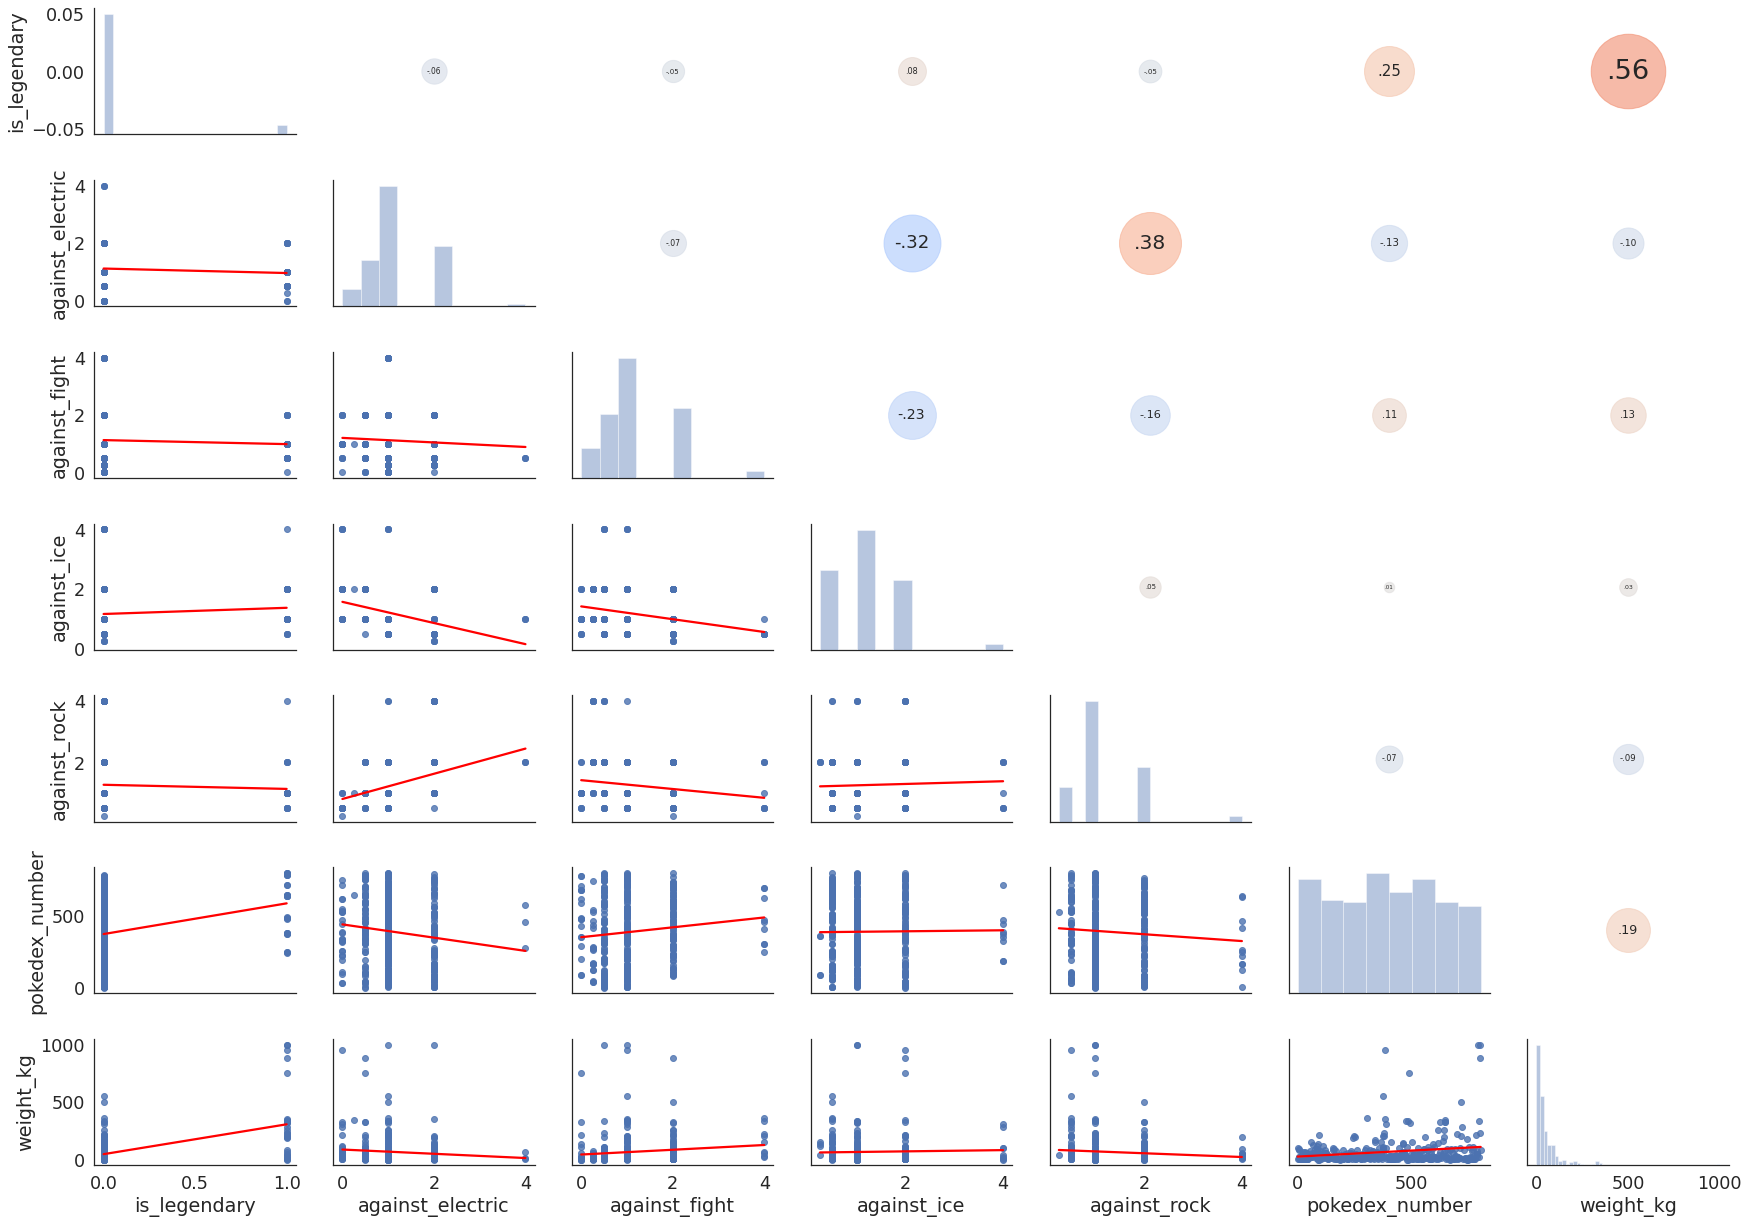

In [ ]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
plot = sns.PairGrid(df, aspect=1.4, diag_sharey=False)
plot.map_lower(sns.regplot, ci=False, line_kws={'color': 'red'})
plot.map_diag(sns.distplot, kde=None)
plot.map_upper(corrdot)

<hr color='red'/>

## **Task 2.5: Baseline Model, version 0 (v0)**



Now you are ready to establish a benchmark metric for all future modeling. For that we need to leave all decisions aside and build a **simple** model with as few decisions as possible. That's because every decision is a hypothesis, which requires experimentation and comparison against previous best performing model. So, we need to build a baseline model, version 0 (v0). Then we can iteratively improve the model by trying out your earlier ideas. 
 
1. 👉Use `train_test_split` to (seed and) split your sample into 80% training set. 
1. 👉Use `LogisticRegression` to build a simple model
  * 📄 Columns with lots of missing (or "bad") values can be ignored. If a column has just a few missing values, it's better to keep it, but remove the rows with bad values. Ignore textual/categorical features which require encoding, etc. These will be tried in model versions below.
1. 👉Compute confusion matrix. 
  1. Explain what the confusion matrix is telling you about the types of mistakes made by the model. 
  1. 👉How dramatic class imbalance? Why?
1. 👉Which (single) metric would you use? Why? 
1. 👉Compute your train and test metric. (Don't forget to add Why/Takeaway)

<!--
1. 👉 Use the dataset to perform a logistic regression with $Y$ as the response and variables from `Xtrain` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones? Calculate both train and test errors.
1. 👉 Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression. 
1. 👉 Describe 5+ **takeaways**.
-->

In [ ]:
df = df.drop(['abilities', 'japanese_name'], axis = 1)
df

,is_legendary,against_electric,against_fight,against_ice,against_rock,capture_rate,pokedex_number,weight_kg
209,0,1.0,0.5,1.0,1.0,75,210,48.7
458,0,0.5,2.0,1.0,2.0,120,459,50.5
698,0,1.0,4.0,0.5,2.0,45,699,225.0
212,0,1.0,1.0,1.0,2.0,190,213,20.5
...,...,...,...,...,...,...,...,...
697,0,1.0,4.0,0.5,2.0,45,698,25.2
31,0,1.0,0.5,1.0,1.0,235,32,9.0
624,0,1.0,4.0,0.5,0.5,45,625,70.0
680,0,1.0,0.0,0.5,0.5,45,681,53.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['is_legendary'], axis=1), df['is_legendary'], test_size=0.2, random_state=0)

log = LogisticRegression()          
log.fit(X_train, y_train)          

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_model(model_used):
    cm = confusion_matrix(y_test, model_used.predict(X_test))
    col = ["Actually Positive", "Actually Negative"]
    cm = pd.DataFrame(cm)
    cm.columns = ["Actually Positive", "Actually Negative"]
    cm.index = ["Predicted Positive","Predicted Negative"]
    cm[col] = np.around(cm[col].div(cm[col].sum(axis=1), axis=0), decimals=2)
    return cm

confusion_matrix_model(log)

,Actually Positive,Actually Negative
Predicted Positive,0.97,0.03
Predicted Negative,0.17,0.83


In [ ]:
y_pred = log.predict(X_test)
print("Accuracy:{}".format(accuracy_score(y_test, y_pred)))

Accuracy:0.9620253164556962


In [ ]:
from sklearn.metrics import r2_score

pY = log.predict(X_test)
print(f'Out-of-sample R^2 is {r2_score(y_test, pY):.2f}')

Out-of-sample R^2 is 0.46


<h3><font color='red'><b>SOLUTION 2.5:</b></font></h3>

Your solution goes here

1. From the confusion matrix we can see that our model makes more type 2 errors, than type 1.
1. Class imbalance is not dramatic, but quite high because we almost don't have legendary pokemons.
1. We have computed Out-of-sample R^2 metric, which shows us not the best results, because the model is still nor improved.
1. However, the accuracy score is quite nice for our model.

<hr color='red'/>

## **Task 2.6: Improved Model, v1**

Improve your model by trying out LDA, QDA, KNN and save improved model as v1. That is your chosen metric should be better for v1.

1. 👉Describe 3+ **takeaways**.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

confusion_matrix_model(lda)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

,Actually Positive,Actually Negative
Predicted Positive,0.99,0.01
Predicted Negative,0.50,0.50


In [ ]:
print("Accuracy:{}".format(accuracy_score(y_test, y_pred)))
print(f'Out-of-sample R^2 is {r2_score(y_test, y_pred):.2f}')

Accuracy:0.9493670886075949
Out-of-sample R^2 is 0.28


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

confusion_matrix_model(qda)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

,Actually Positive,Actually Negative
Predicted Positive,0.97,0.03
Predicted Negative,0.33,0.67


In [ ]:
print("Accuracy:{}".format(accuracy_score(y_test, y_pred)))
print(f'Out-of-sample R^2 is {r2_score(y_test, y_pred):.2f}')

Accuracy:0.9493670886075949
Out-of-sample R^2 is 0.28


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='uniform')

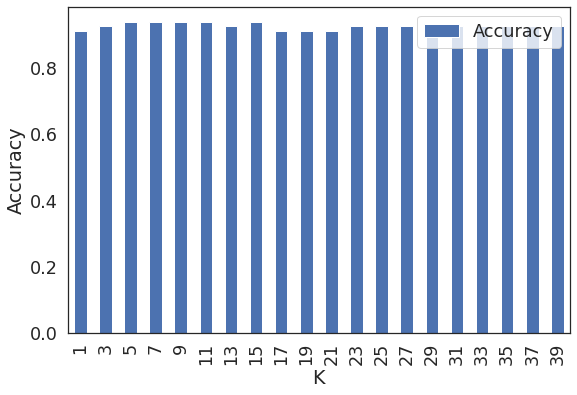

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#searching for optimal K
neighbors = list(range(1,40,2))

cv_scores = [ ]

for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy")

    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    cv_scores.append(accuracy_score(y_test,pred))

def plot_accuracy(knn_list_scores):
    pd.DataFrame({"K":[i for i in neighbors], "Accuracy":knn_list_scores}).set_index("K").plot.bar(figsize=(9,6))
    plt.ylabel('Accuracy')
    plt.show()

plot_accuracy(cv_scores)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

confusion_matrix_model(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

,Actually Positive,Actually Negative
Predicted Positive,0.99,0.01
Predicted Negative,0.67,0.33


In [ ]:
print("Accuracy:{}".format(accuracy_score(y_test, y_pred)))
print(f'Out-of-sample R^2 is {r2_score(y_test, y_pred):.2f}')

Accuracy:0.9367088607594937
Out-of-sample R^2 is 0.10


<h3><font color='red'><b>SOLUTION 2.6:</b></font></h3>

Your solution goes here

1. As we can see from the results, our first baseline model is the best one.
1. KNN even with the optimal K shows the worst results.
1. QDA and LDA works similar in our case, but still not as good as baseline model. Type 2 error increased significantly, as we can see from confusion matrices.